کتابخانه های مورد نیاز

دانلود دیتاست مورد استفاده:   https://www.mediafire.com/file/j03djpy140rno4d/data.rar/file

In [186]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt


وارد کردن دیتاست

In [187]:
data_dir = "data"  
categories = os.listdir(data_dir) 

داده‌ها و برچسب‌ها 

In [188]:
images = []
labels = []

فرمت‌های تصویری پشتیبانی‌شده

In [189]:
valid_formats = ('.jpg', '.png', '.gif', '.jpeg')

تغییر سایز

In [190]:
img_size = 32

پیش‌ پردازش تصاویر

In [191]:
for label, category in enumerate(categories):  
    category_path = os.path.join(data_dir, category)  
    for file in os.listdir(category_path):  
        if file.lower().endswith(valid_formats):  
            file_path = os.path.join(category_path, file)  
            try:  
                
                img = cv2.imread(file_path, cv2.IMREAD_COLOR)  
                if img is not None:  
                    img_resized = cv2.resize(img, (img_size, img_size))  
                    images.append(img_resized)  
                    labels.append(label)  
                else:  
                    print(f"Error loading image: {file_path}")  
            except Exception as e:  
                print(f"Error processing {file_path}: {e}")  


Error loading image: data\Sad\crying-sad.gif


 و نرمال سازی تبدیل به آرایه numpy 

In [192]:
images = np.array(images) / 255.0  
labels = np.array(labels)

ورود لیبل ها به صورت one hot

In [193]:
labels = to_categorical(labels, num_classes=len(categories))


تقسیم داده‌های آموزشی و آزمایشی

In [194]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


تغییر شکل تصاویر برای ورود به RNN

In [195]:
X_train = X_train.reshape(X_train.shape[0], 1, img_size * img_size * 3)  
X_test = X_test.reshape(X_test.shape[0], 1, img_size * img_size * 3)

In [196]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")

Shape of X_train: (211, 1, 3072)
Shape of y_train: (211, 3)


یکسان سازی شکل 

In [197]:
y_train = y_train.reshape(y_train.shape[0], -1)
y_test = y_test.reshape(y_test.shape[0], -1)

ساخت مدل RNN

In [198]:
model = Sequential()
model.add(LSTM(128, input_shape=(1, img_size * img_size * 3), return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(categories), activation='softmax'))

کامپایل مدل

In [199]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


حذف بعد اضافی از y_train و y_test

In [200]:
y_train = y_train.reshape(y_train.shape[0], -1)
y_test = y_test.reshape(y_test.shape[0], -1)

print(f"y_train shape after reshape: {y_train.shape}")


y_train shape after reshape: (211, 3)


آموزش مدل

In [201]:
lr_scheduler = ReduceLROnPlateau(  
    monitor='val_loss', factor=0.5, patience=5, verbose=1  
)  
 
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40, batch_size=32, callbacks=[lr_scheduler])

Epoch 1/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.3811 - loss: 1.1032 - val_accuracy: 0.3774 - val_loss: 1.0858 - learning_rate: 0.0010
Epoch 2/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3976 - loss: 1.1210 - val_accuracy: 0.4340 - val_loss: 1.0854 - learning_rate: 0.0010
Epoch 3/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4260 - loss: 1.0969 - val_accuracy: 0.3962 - val_loss: 1.0808 - learning_rate: 0.0010
Epoch 4/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4029 - loss: 1.0775 - val_accuracy: 0.3962 - val_loss: 1.0745 - learning_rate: 0.0010
Epoch 5/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4119 - loss: 1.0596 - val_accuracy: 0.4717 - val_loss: 1.0606 - learning_rate: 0.0010
Epoch 6/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5172 - loss: 1.0181 - val_accuracy: 0.4340 - val_loss: 1.0573 - learning_rate: 0.0010
Epoch 7/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4901 - loss: 1.0104 - val_accuracy: 0.5094 

ارزیابی مدل

In [202]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6694 - loss: 0.8313
Test Accuracy: 66.04%


رسم نمودار

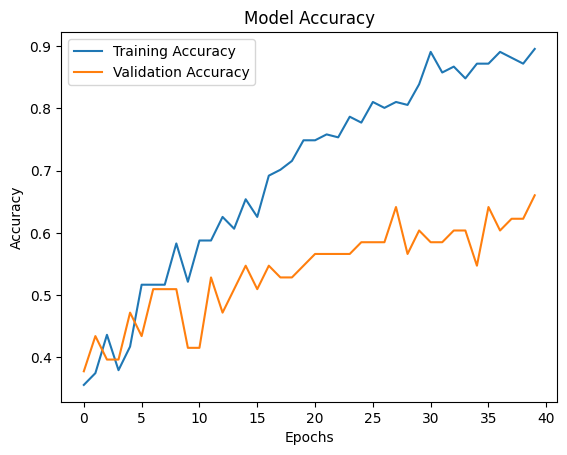

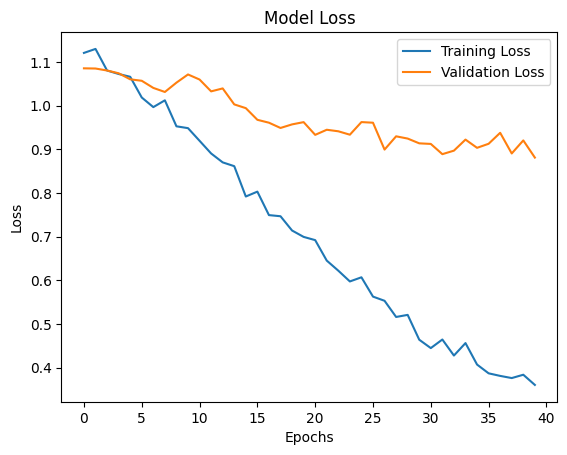

In [203]:

# accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
